In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = "/content/drive/MyDrive/CropWeed"
directory

'/content/drive/MyDrive/CropWeed'

Sample images along with labels
1.   Label 0 indicates that image is a sesame crop
2.   Label 1 indicates that image is a weed



Image:  agri_0_6707.jpeg
Labels:  ['0 0.501953 0.459961 0.996094 0.650391']


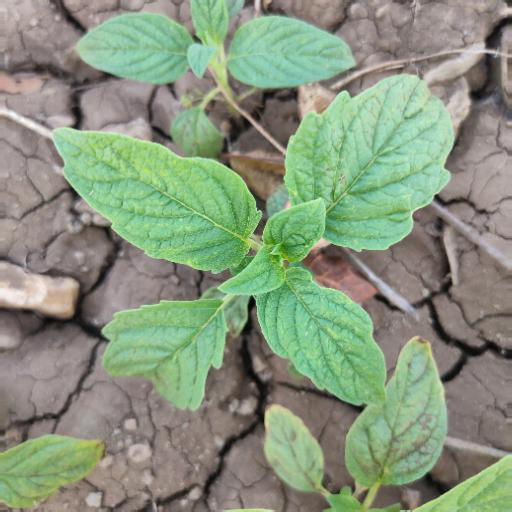

In [ ]:
image_files = [filename for filename in os.listdir(directory) if filename.endswith(('.jpg', '.png', '.jpeg'))]
sample_image_file = image_files[4]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()


Image:  agri_0_6697.jpeg
Labels:  ['0 0.484375 0.502930 0.863281 0.994141']


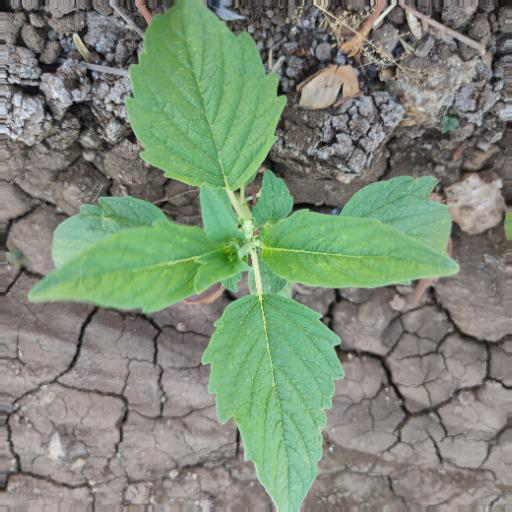

In [ ]:
sample_image_file = image_files[12]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()

Image:  agri_0_7119.jpeg
Labels:  ['0 0.559570 0.593750 0.685547 0.464844']


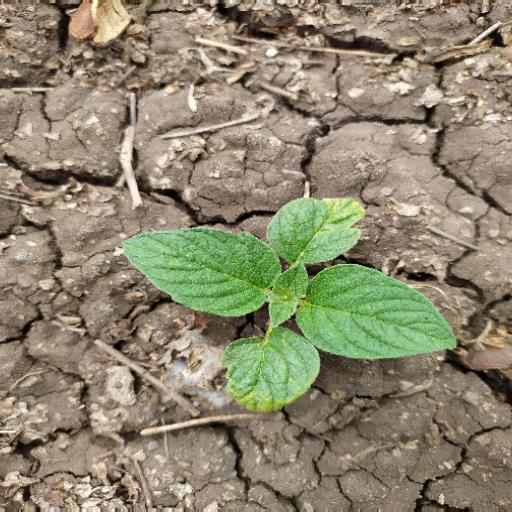

In [ ]:
sample_image_file = image_files[64]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()

Image:  agri_0_7092.jpeg
Labels:  ['1 0.592773 0.526367 0.666016 0.662109']


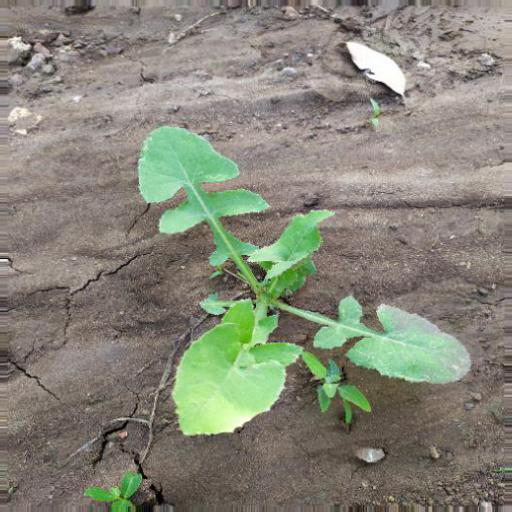

In [ ]:
sample_image_file = image_files[65]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()

Image:  agri_0_6701.jpeg
Labels:  ['1 0.479492 0.568359 0.486328 0.449219']


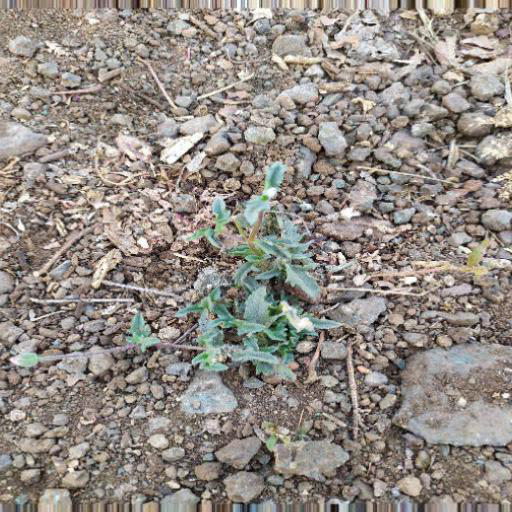

In [ ]:
sample_image_file = image_files[14]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()

Image:  agri_0_7285.jpeg
Labels:  ['1 0.579102 0.558594 0.580078 0.582031']


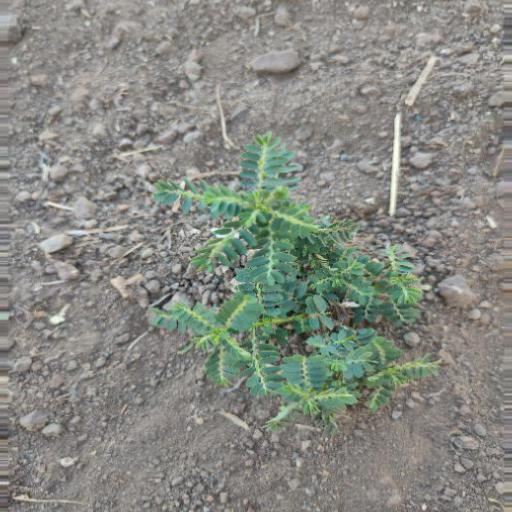

In [ ]:
sample_image_file = image_files[104]
sample_image_path = os.path.join(directory, sample_image_file)
sample_image = Image.open(sample_image_path)
sample_text_file = os.path.splitext(sample_image_file)[0] + ".txt"
sample_text_path = os.path.join(directory, sample_text_file)
with open(sample_text_path, 'r') as text_file:
    labels = text_file.read().splitlines()
print("Image: ", sample_image_file)
print("Labels: ", labels)
sample_image.show()

# **DATA PRE PROCESSING**

In [ ]:
height = 512
width = 512 # fixing the image sizes
input_shape = (height,width,3)
input_shape

(512, 512, 3)

In [ ]:
# Directories to save the separated images
crops = '/content/drive/MyDrive/CropWeed/crops'
weeds = '/content/drive/MyDrive/CropWeed/weeds'
crops

'/content/drive/MyDrive/CropWeed/crops'

In [ ]:
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)

        text_filename = os.path.splitext(filename)[0] + ".txt"
        text_path = os.path.join(directory, text_filename)

        with open(text_path, 'r') as text_file:
            lines = text_file.read().splitlines()
        counter = 1
        for line in lines:
            values = line.split()
            label = int(values[0])
            x = float(values[1])
            y = float(values[2])
            width = float(values[3])
            height = float(values[4])

            if label == 0:
                category = "crop"
            elif label == 1:
                category = "weed"
            else:
                category = "unknown"

            left = int(x * input_shape[0])
            top = int(y * input_shape[1])
            right = int((x + width) * input_shape[0])
            bottom = int((y + height) * input_shape[1])

            crop_image = image.crop((left, top, right, bottom))

            save_filename = f"{os.path.splitext(filename)[0]}_{label}_{counter}.jpg"

            if category == "crop":
                save_path = os.path.join(crops, save_filename)
            else:
                save_path = os.path.join(weeds, save_filename)

            crop_image.save(save_path)
            counter += 1

## **Printing the images after seperating them**

## **1. Images of Crops**

In [ ]:

crops = '/content/drive/MyDrive/CropWeed/crops'
weeds = '/content/drive/MyDrive/CropWeed/weeds'


Image:  agri_0_6707_0_1.jpg


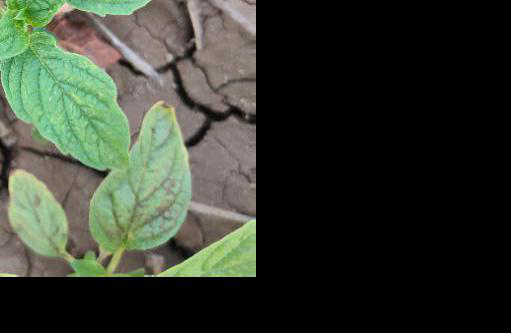

In [ ]:
image_files = [filename for filename in os.listdir(crops) if filename.endswith(('.jpg', '.png', '.jpeg'))]
sample_image_file = image_files[0]
sample_image_path = os.path.join(crops, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

In [ ]:
sample_image_file = image_files[190]
sample_image_path = os.path.join(crops, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

Image:  agri_0_7034_0_1.jpg


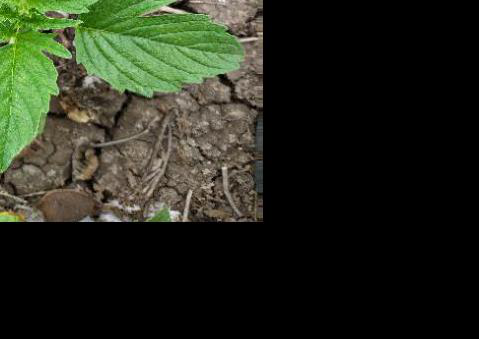

In [ ]:
sample_image_file = image_files[30]
sample_image_path = os.path.join(crops, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

## 2. Images of weeds

Image:  agri_0_6581_1_1.jpg


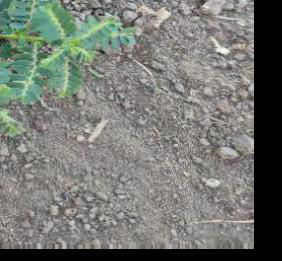

In [ ]:
image_files = [filename for filename in os.listdir(weeds) if filename.endswith(('.jpg', '.png', '.jpeg'))]
sample_image_file = image_files[0]
sample_image_path = os.path.join(weeds, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

Image:  agri_0_6690_1_1.jpg


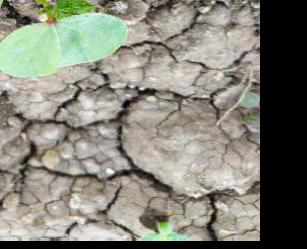

In [ ]:
sample_image_file = image_files[10]
sample_image_path = os.path.join(weeds, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

Image:  agri_0_7375_1_1.jpg


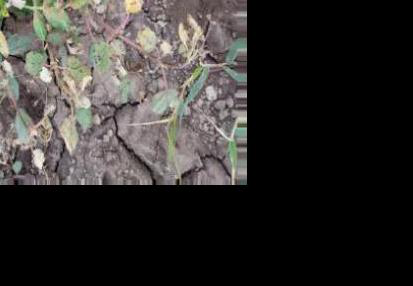

In [ ]:
sample_image_file = image_files[80]
sample_image_path = os.path.join(weeds, sample_image_file)
sample_image = Image.open(sample_image_path)
print("Image: ", sample_image_file)
sample_image.show()

In [1]:
train_dir = "/content/drive/MyDrive/CropWeed/TrainData"

In [3]:
import random
import shutil

In [2]:
labels = ['crops','weeds']
labels

['crops', 'weeds']

In [3]:
import cv2
import numpy as np
import os

In [4]:
img_size=256
data=[]

def get_training_data(data_dir):
  tz=0
  for label in labels:
    path=os.path.join(data_dir,label)
    print(path)
    class_num=labels.index(label)
    print(class_num)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),cv2.COLOR_BAYER_GB2RGB)
        resized_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([resized_arr,class_num])
      except Exception as e:
        print(e)
  return np.array(class_num)

  return np.array(data)
train=get_training_data("/content/drive/MyDrive/CropWeed/TrainData")
data

/content/drive/MyDrive/CropWeed/TrainData/crops
0
/content/drive/MyDrive/CropWeed/TrainData/weeds
1


[[array([[[ 57,  83,  90],
          [ 57,  83,  90],
          [ 54,  80,  87],
          ...,
          [135, 174, 102],
          [135, 175, 103],
          [135, 175, 103]],
  
         [[ 57,  83,  90],
          [ 57,  83,  90],
          [ 54,  80,  87],
          ...,
          [135, 174, 103],
          [135, 175, 103],
          [135, 175, 103]],
  
         [[ 56,  81,  89],
          [ 56,  81,  89],
          [ 54,  79,  87],
          ...,
          [135, 175, 103],
          [135, 176, 104],
          [135, 176, 104]],
  
         ...,
  
         [[146, 198, 161],
          [146, 198, 161],
          [146, 198, 161],
          ...,
          [ 96, 159,  84],
          [ 95, 159,  83],
          [ 95, 159,  83]],
  
         [[146, 198, 161],
          [146, 198, 161],
          [146, 198, 161],
          ...,
          [ 98, 161,  85],
          [ 96, 160,  84],
          [ 96, 160,  84]],
  
         [[146, 198, 161],
          [146, 198, 161],
          [146, 198, 161

In [6]:
lst = os.listdir('/content/drive/MyDrive/CropWeed/TrainData/crops')
number_files = len(lst)
print(number_files)

1212


In [7]:
lst = os.listdir('/content/drive/MyDrive/CropWeed/TrainData/weeds')
number_files = len(lst)
print(number_files)

860


In [5]:
x = []
y = []
for i,j in data:
  x.append(i)
  y.append(j)
print(len(y))

2072


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

1657
415
1657
415


In [8]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
print(xtrain.shape)
print(xtest.shape)

(1657, 256, 256, 3)
(415, 256, 256, 3)


In [9]:
xtrain1 = xtrain.reshape(1657,196608)
xtest2 = xtest.reshape(415,196608)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
xtrain1 = sc.fit_transform(xtrain1)
xtrain1

array([[-0.42810997, -0.59652661,  0.39938615, ..., -0.66655489,
        -0.66602759, -0.66913232],
       [ 0.01561194, -1.07686282, -0.61622611, ..., -0.66655489,
        -0.66602759, -0.66913232],
       [-0.00657415,  0.51698006, -0.29420271, ..., -0.66655489,
        -0.66602759, -0.66913232],
       ...,
       [ 0.03779804, -0.48735929,  0.54801234, ...,  1.66683486,
         1.64897193,  1.74043286],
       [ 0.74775309,  0.8008151 ,  0.67186749, ..., -0.66655489,
        -0.66602759, -0.66913232],
       [-0.60559873, -1.36069785, -0.71531023, ...,  1.77500525,
         1.64897193,  1.65588671]])

In [13]:
xtest2 = sc.fit_transform(xtest2)
xtest2

array([[ 0.3317075 , -0.41171502, -0.51833826, ..., -0.65761623,
        -0.65735128, -0.6606198 ],
       [ 1.01844984,  0.46357824,  1.360355  , ...,  1.77104484,
         1.73181556,  1.75820018],
       [-1.59560167, -2.88049088, -2.29815293, ..., -0.65761623,
        -0.65735128, -0.6606198 ],
       ...,
       [ 1.0627558 , -0.00773351,  0.44572802, ..., -0.65761623,
        -0.65735128, -0.6606198 ],
       [-1.39622486, -0.47904527, -0.83969369, ..., -0.65761623,
        -0.65735128, -0.6606198 ],
       [ 1.92672198,  1.74285301,  2.7446553 , ...,  1.48153557,
         1.52144867,  1.13163838]])

In [ ]:
crops = '/content/drive/MyDrive/CropWeed/TrainData/crops'
weeds = '/content/drive/MyDrive/CropWeed/TrainData/weeds'

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic = LogisticRegression(max_iter=1500)

In [16]:
logistic.fit(xtrain1,ytrain)

LogisticRegression(max_iter=1500)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
print(f'Training Score in Logistic Regression = {accuracy_score(ytrain,logistic.predict(xtrain1))}')

Training Score in Logistic Regression = 1.0


In [20]:
print(f'Testing Score in Logistic Regression = {accuracy_score(ytest,logistic.predict(xtest2))}')

Testing Score in Logistic Regression = 0.7253012048192771


In [21]:
cm = confusion_matrix(ytest,logistic.predict(xtest2))

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

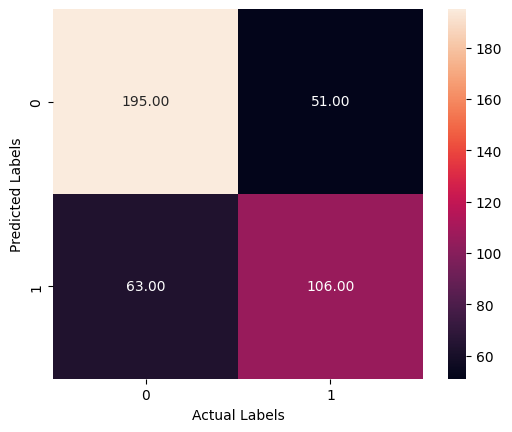

In [23]:
sns.heatmap(cm,annot=True,fmt='.2f',square=True)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [26]:
print('Classification Report in Logistic Regression = ')
print(classification_report(ytest,logistic.predict(xtest2)))

Classification Report in Logistic Regression = 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       246
           1       0.68      0.63      0.65       169

    accuracy                           0.73       415
   macro avg       0.72      0.71      0.71       415
weighted avg       0.72      0.73      0.72       415



In [27]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(splitter='best',criterion='gini')

In [32]:
dt.fit(xtrain1,ytrain)

DecisionTreeClassifier()

In [33]:
print(f'Training Score in Decision Tree = {accuracy_score(ytrain,dt.predict(xtrain1))}')

Training Score in Decision Tree = 1.0


In [34]:
print(f'Training Score in Decision Tree = {accuracy_score(ytest,dt.predict(xtest2))}')

Training Score in Decision Tree = 0.6771084337349398


In [35]:
cm = confusion_matrix(ytest,dt.predict(xtest2))

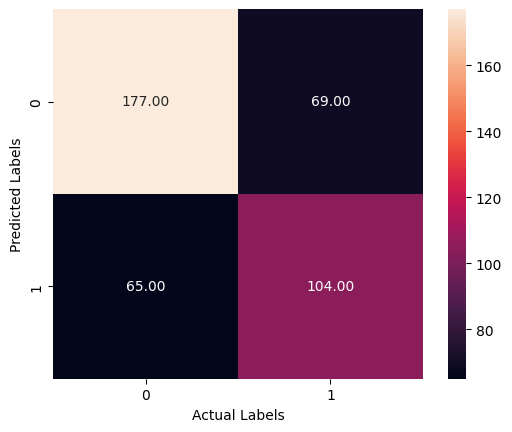

In [36]:
sns.heatmap(cm,annot=True,fmt='.2f',square=True)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [37]:
print('Classification Report in Decision Tree = ')
print(classification_report(ytest,dt.predict(xtest2)))

Classification Report in Decision Tree = 
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       246
           1       0.60      0.62      0.61       169

    accuracy                           0.68       415
   macro avg       0.67      0.67      0.67       415
weighted avg       0.68      0.68      0.68       415



In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
naive = GaussianNB()

In [42]:
naive.fit(xtrain1,ytrain)

GaussianNB()

In [44]:
print(f'Training Score in Naive Bayes = {accuracy_score(ytrain,naive.predict(xtrain1))}')

Training Score in Naive Bayes = 0.6288473144236573


In [46]:
print(f'Testing Score in Naive Bayes = {accuracy_score(ytest,naive.predict(xtest2))}')

Testing Score in Naive Bayes = 0.5807228915662651


In [47]:
cm = confusion_matrix(ytest,naive.predict(xtest2))

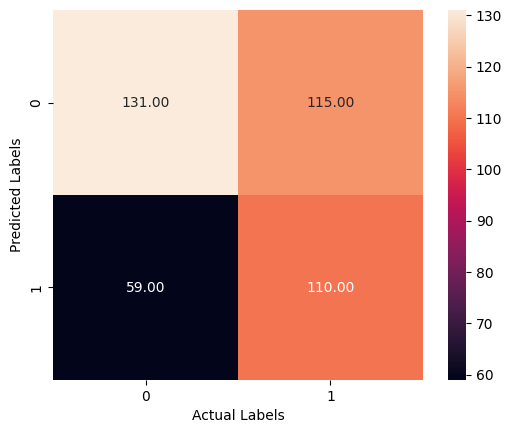

In [48]:
sns.heatmap(cm,annot=True,fmt='.2f',square=True)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [52]:
rf.fit(xtrain1,ytrain)

RandomForestClassifier()

In [53]:
print(f'Training Score in Random Forest Classifier = {accuracy_score(ytrain,rf.predict(xtrain1))}')

Training Score in Random Forest Classifier = 1.0


In [54]:
print(f'Testing Score in Random Forest Classifier = {accuracy_score(ytest,rf.predict(xtest2))}')

Testing Score in Random Forest Classifier = 0.8361445783132531


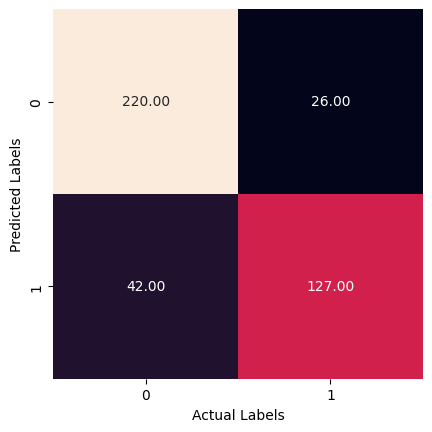

In [77]:
cm = confusion_matrix(ytest,rf.predict(xtest2))
sns.heatmap(cm,annot=True,fmt='.2f',square=True,cbar=False)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [57]:
import xgboost as xgb

In [58]:
XGB = xgb.XGBClassifier()

In [59]:
XGB.fit(xtrain1,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
print(f'Training Score in XG Boost Classifier = {accuracy_score(ytrain,XGB.predict(xtrain1))}')

Training Score in XG Boost Classifier = 1.0


In [61]:
print(f'Testing Score in XG Boost Classifier = {accuracy_score(ytest,XGB.predict(xtest2))}')

Testing Score in XG Boost Classifier = 0.8385542168674699


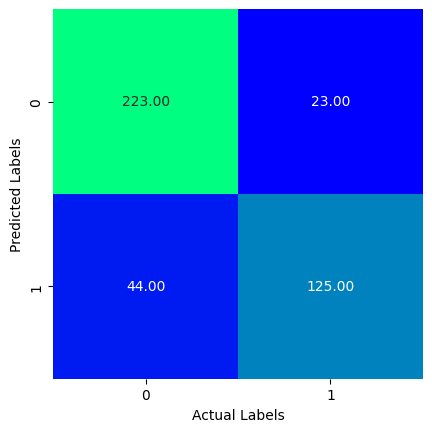

In [62]:
cm = confusion_matrix(ytest,XGB.predict(xtest2))
sns.heatmap(cm,annot=True,fmt='.2f',square=True,cmap='winter',cbar=False)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [63]:
from sklearn.metrics import roc_curve, auc

In [65]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [66]:
y_probs_1 = logistic.predict_proba(xtest2)
y_probs_2 = dt.predict_proba(xtest2)
y_probs_3 = rf.predict_proba(xtest2)
y_probs_4 = XGB.predict_proba(xtest2)
y_probs_5 = naive.predict_proba(xtest2)

In [64]:
n_classes = len(np.unique(ytest))
n_classes

2

In [74]:
for i in range(n_classes):
    #y_test_i = (ytest == i).astype(int)
    #print(y_test_i)
    y_test_i = np.array(ytest).astype(int)
    y_score_1 = y_probs_1[:, i]
    y_score_2 = y_probs_2[:, i]
    y_score_3 = y_probs_3[:, i]
    y_score_4 = y_probs_4[:, i]
    y_score_5 = y_probs_5[:, i]
    fpr[1], tpr[1], _ = roc_curve(y_test_i, y_score_1)
    fpr[2], tpr[2], _ = roc_curve(y_test_i, y_score_2)
    fpr[3], tpr[3], _ = roc_curve(y_test_i, y_score_3)
    fpr[4], tpr[4], _ = roc_curve(y_test_i, y_score_4)
    fpr[5], tpr[5], _ = roc_curve(y_test_i, y_score_5)
    roc_auc[1] = auc(fpr[1], tpr[1])
    roc_auc[2] = auc(fpr[2], tpr[2])
    roc_auc[3] = auc(fpr[3], tpr[3])
    roc_auc[4] = auc(fpr[4], tpr[4])
    roc_auc[5] = auc(fpr[5], tpr[5])

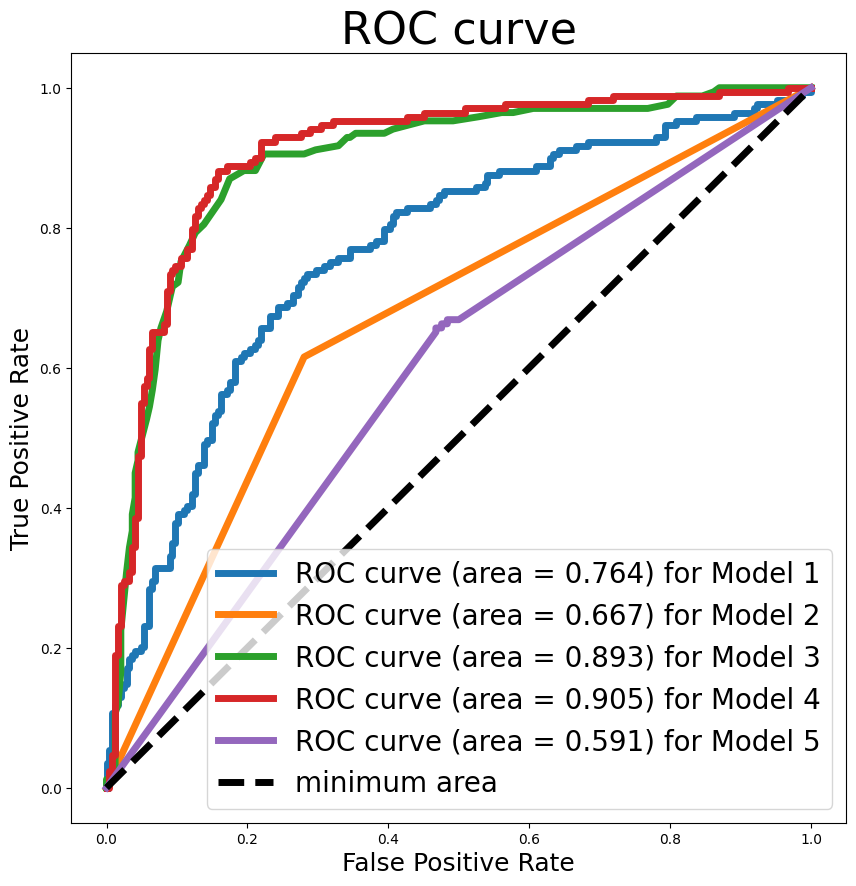

In [75]:
plt.figure(figsize=(10,10))
lw = 5
for i in range(1, lw+1):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = {}) for Model {}'.format(round(roc_auc[i],3), i))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='minimum area')
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('ROC curve',fontsize=32)
plt.legend(loc="lower right",fontsize=20)
plt.show()

Model 4 is Our XGB Classifier with area 90.5

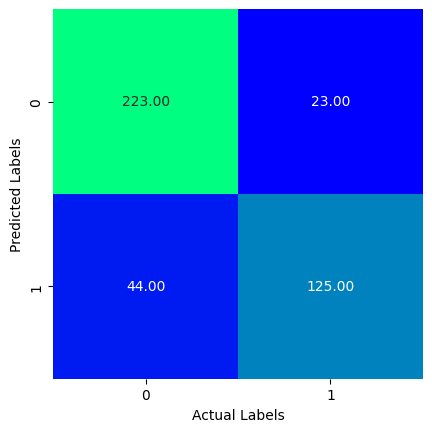

In [76]:
cm = confusion_matrix(ytest,XGB.predict(xtest2))
sns.heatmap(cm,annot=True,fmt='.2f',square=True,cmap='winter',cbar=False)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [78]:
print('Classification Report in XGB Classifier = ')
print(classification_report(ytest,XGB.predict(xtest2)))

Classification Report in XGB Classifier = 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       246
           1       0.84      0.74      0.79       169

    accuracy                           0.84       415
   macro avg       0.84      0.82      0.83       415
weighted avg       0.84      0.84      0.84       415



**Saving the XGB Model**

In [79]:
import pickle

In [82]:
pickle.dump(XGB,open('my_crop_weed_model.pkl','wb'))

# Testing with Sample Image

In [83]:
path = "/content/drive/MyDrive/CropWeed/TrainData/crops/agri_0_1028_0_12.jpg"

In [84]:
import cv2
from google.colab.patches import cv2_imshow

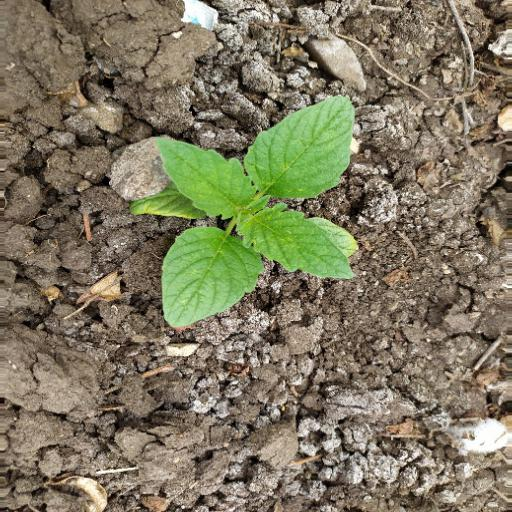

In [92]:
image = cv2.imread("/content/drive/MyDrive/CropWeed/agri_0_1026.jpeg")
#image =cv2.resize(image,(512,512))
cv2_imshow( image)